In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
startups=pd.read_csv("50_Startups.csv")
startups.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Data understanding: 

### Initial analysis: 

In [162]:
startups.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

#### Missing value :

In [163]:
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

####  Duplicate : 

In [164]:
startups[startups.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [165]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [166]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Assumptions check:

###  1. Normality test:

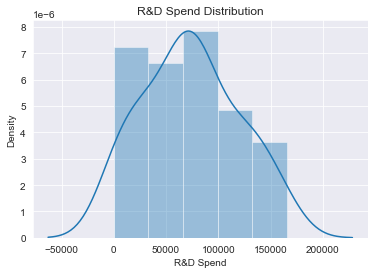

In [167]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(a=startups["R&D Spend"])
plt.title("R&D Spend Distribution")
plt.show()

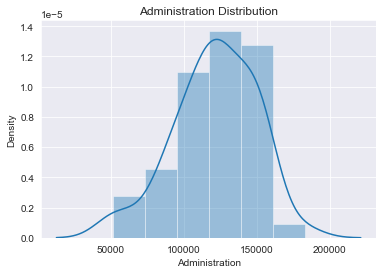

In [168]:
sns.distplot(a=startups["Administration"])
plt.title("Administration Distribution")
plt.show()

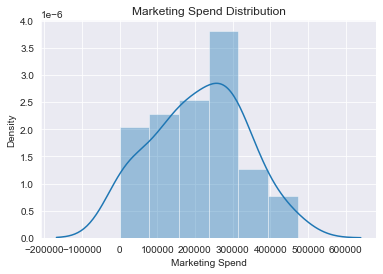

In [169]:
sns.distplot(a=startups["Marketing Spend"])
plt.title("Marketing Spend Distribution")
plt.show()

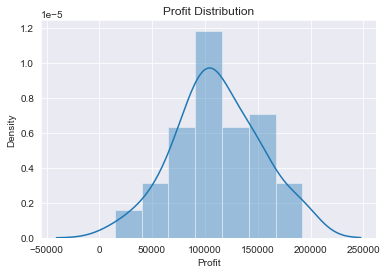

In [170]:
sns.distplot(a=startups["Profit"])
plt.title("Profit Distribution")
plt.show()

###  Probplot:

In [171]:
from scipy import stats

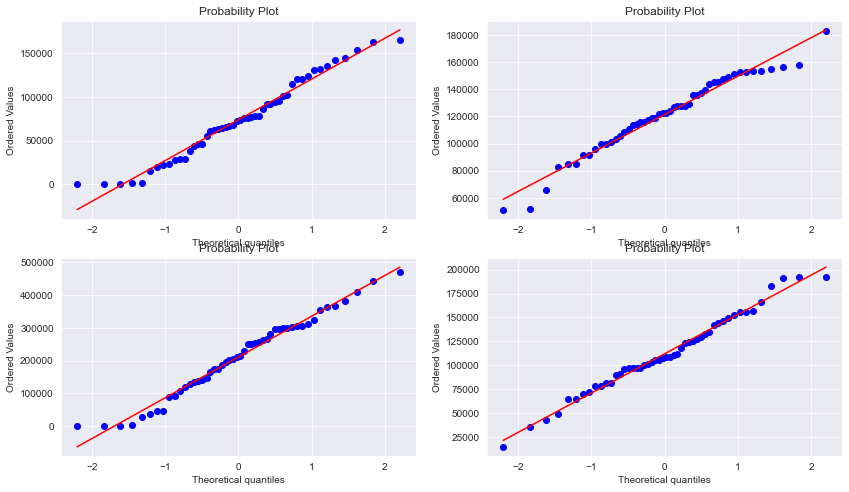

In [172]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
stats.probplot(x =startups["R&D Spend"],dist='norm',plot=plt)
plt.subplot(2,2,2)
stats.probplot(x =startups["Administration"],dist='norm',plot=plt)
plt.subplot(2,2,3)
stats.probplot(x =startups["Marketing Spend"],dist='norm',plot=plt)
plt.subplot(2,2,4)
stats.probplot(x =startups["Profit"],dist='norm',plot=plt)
plt.show()

### Linearity Test:

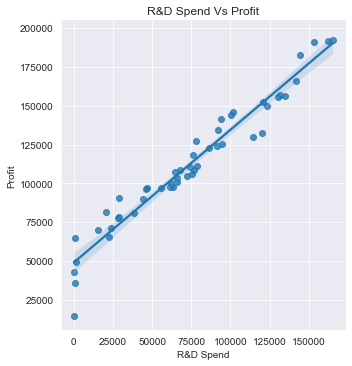

In [173]:
sns.lmplot(x='R&D Spend',y='Profit',data=startups)
plt.title('R&D Spend Vs Profit')
plt.show()

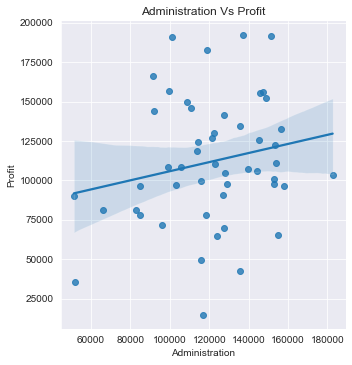

In [174]:
sns.lmplot(x='Administration',y='Profit',data=startups)
plt.title('Administration Vs Profit')
plt.show()

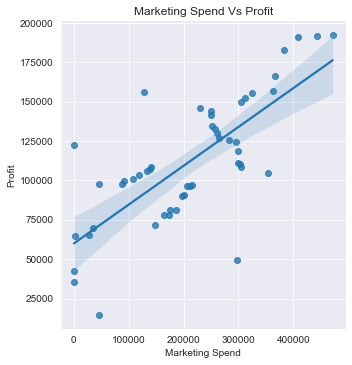

In [175]:
sns.lmplot(x='Marketing Spend',y='Profit',data=startups)
plt.title('Marketing Spend Vs Profit')
plt.show()

###  Observation:

###  we have to transform the data to achieve better linearity

###  Multi Colinearity test:

###  Correlation Matrix:

In [176]:
coff=round(startups.corr(),3)
coff

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000,0.242,0.724,0.973
Administration,0.242,1.000,-0.032,0.201
Marketing Spend,0.724,-0.032,1.000,0.748
Profit,0.973,0.201,0.748,1.000


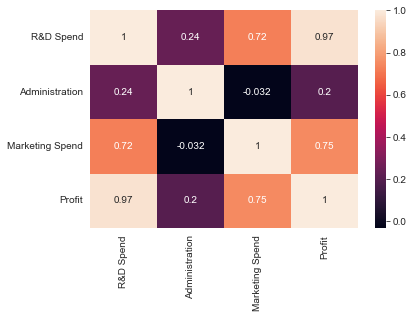

In [177]:
sns.heatmap(data =coff,annot=True)
plt.show()

###  Data preprocessing:

In [178]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [179]:
startups_copy=startups.copy()

In [180]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [181]:
labeled_st=le.fit_transform(startups_copy["State"])

In [182]:
labeled_st

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0])

In [183]:
startups_copy=startups_copy.drop("State",axis=1)

In [184]:
startups_copy["State"]=labeled_st

In [185]:
startups_copy.head()

,R&D Spend,Administration,Marketing Spend,Profit,State
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1


###  MultiColenearity test: 

####  Correlation Matrix:

In [186]:
startups_copy.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.104685
Administration,0.241955,1.000000,-0.032154,0.200717,0.011847
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.077670
Profit,0.972900,0.200717,0.747766,1.000000,0.101796
State,0.104685,0.011847,0.077670,0.101796,1.000000


#### Heatmap:

<AxesSubplot:>

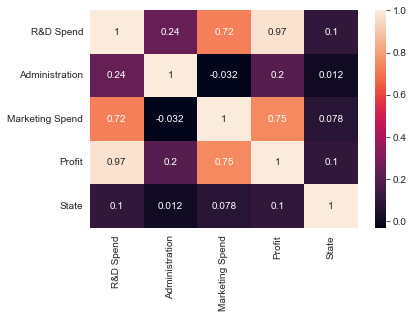

In [187]:
sns.heatmap(startups_copy.corr(),annot=True)

###  Data preparation :  For Model building

###  Train _test_split:

In [188]:
x=startups_copy.drop(labels='Profit',axis=1)
y=startups_copy[['Profit']]

In [189]:
[x.shape,y.shape]

[(50, 4), (50, 1)]

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=None)

In [192]:
x_train.shape,y_train.shape

((40, 4), (40, 1))

In [193]:
x_test.shape,y_test.shape

((10, 4), (10, 1))

## Model Building || Model Training:

In [194]:
from sklearn.linear_model import LinearRegression

In [195]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [196]:
y_train_pred=model.predict(x_train)

In [197]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Model Evaluation:

In [198]:
print("Mean squared error:",mean_squared_error(y_train,y_train_pred),"\n Mean absolute error:",mean_absolute_error(y_train,y_train_pred))

Mean squared error: 95080330.08474521 
 Mean absolute error: 7570.236393046935


In [199]:
from sklearn.metrics import  r2_score

In [200]:
print("Rsquare value:",r2_score(y_train,y_train_pred))

Rsquare value: 0.946967630549264


###  Model testing with test data:

In [201]:
y_test_pred =model.predict(x_test)

###  Model Evaluation:

In [202]:
print("Mean squared error:",mean_squared_error(y_test,y_test_pred),"\n Mean absolute error:",mean_absolute_error(y_test,y_test_pred))

Mean squared error: 13870344.594858045 
 Mean absolute error: 2670.992715781557


In [203]:
print("Rsquare value:",r2_score(y_test,y_test_pred))

Rsquare value: 0.9815681366846222


###  Rsquare table:

In [204]:
pd.DataFrame({"Rsqared_train_value": [0.954], "Rsquared_test_value": [0.916]})

,Rsqared_train_value,Rsquared_test_value
0,0.954,0.916


## Transformation:

###   1.Approach with original data:

In [205]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [206]:
startups_copy.head()

,R&D Spend,Administration,Marketing Spend,Profit,State
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1


In [207]:
startups_copy_1=startups_copy.copy()

In [208]:
startups_copy_1=startups_copy_1.rename(columns ={"R&D Spend" : "RD_spend","Marketing Spend" :  "Marketing_spend"})

In [209]:
startups_copy_1.head()

,RD_spend,Administration,Marketing_spend,Profit,State
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1


###  assumption check:

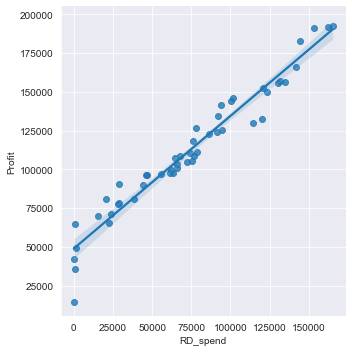

In [210]:
sns.lmplot(x='RD_spend',y='Profit',data=startups_copy_1)
plt.show()

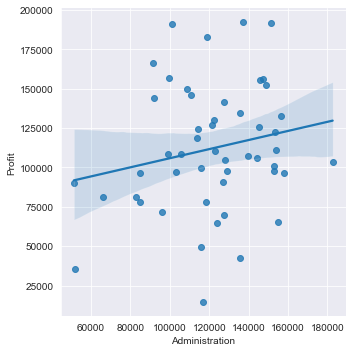

In [211]:
sns.lmplot(x='Administration',y='Profit',data=startups_copy_1)

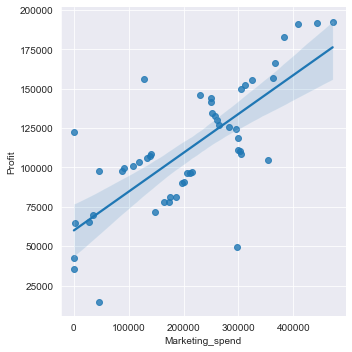

In [212]:
sns.lmplot(x='Marketing_spend',y='Profit',data=startups_copy_1)

In [213]:
startups_copy_1.corr()

,RD_spend,Administration,Marketing_spend,Profit,State
RD_spend,1.000000,0.241955,0.724248,0.972900,0.104685
Administration,0.241955,1.000000,-0.032154,0.200717,0.011847
Marketing_spend,0.724248,-0.032154,1.000000,0.747766,0.077670
Profit,0.972900,0.200717,0.747766,1.000000,0.101796
State,0.104685,0.011847,0.077670,0.101796,1.000000


<AxesSubplot:>

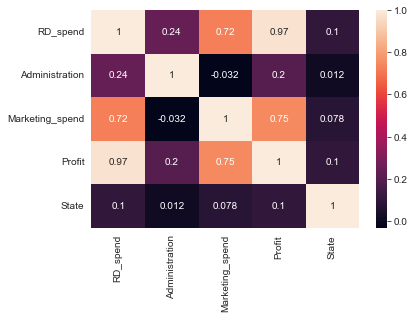

In [214]:
sns.heatmap(startups_copy_1.corr(),annot=True)

###   Scatterplot between variables along with histograms

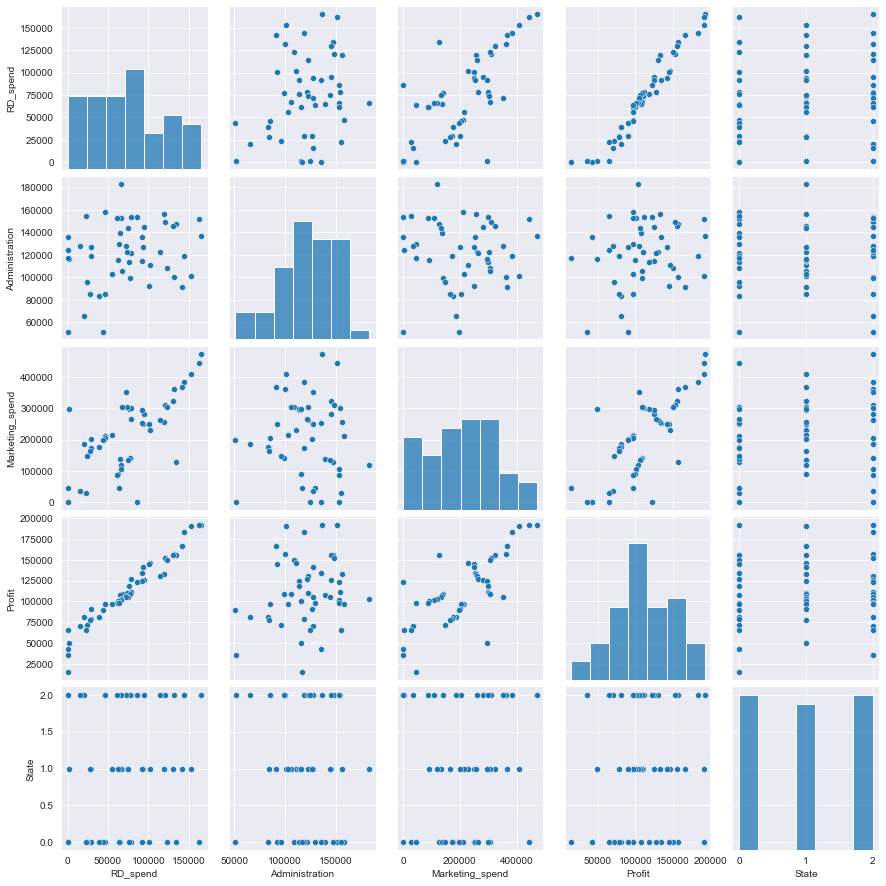

In [215]:
sns.set_style(style='darkgrid')
sns.pairplot(startups_copy_1)

###  Model Building using stats model

In [216]:
import statsmodels.formula.api as smf

In [217]:
startups_copy_1.head(2)

,RD_spend,Administration,Marketing_spend,Profit,State
0,165349.2,136897.80,471784.10,192261.83,2
1,162597.7,151377.59,443898.53,191792.06,0


###  Models:

In [218]:
model1=smf.ols(formula='Profit~ RD_spend+ Administration+ Marketing_spend', data=startups_copy_1).fit()

In [219]:
model2=smf.ols(formula='Profit~ RD_spend+ Marketing_spend', data=startups_copy_1).fit()

In [220]:
model3=smf.ols(formula='Profit~ RD_spend+ Administration', data=startups_copy_1).fit()

In [221]:
model4=smf.ols(formula='Profit~Administration+ Marketing_spend', data=startups_copy_1).fit()

In [222]:
model5=smf.ols(formula='Profit~ RD_spend+ Administration+ Marketing_spend+State', data=startups_copy_1).fit()

In [223]:
model6=smf.ols(formula='Profit~ RD_spend+ Administration+State', data=startups_copy_1).fit()

In [224]:
model7=smf.ols(formula='Profit~  Administration+ Marketing_spend+State', data=startups_copy_1).fit()

## Model Performance:

####   Model 1 Performance

In [225]:


print('R2 Score    : ',round(model1.rsquared,4))
print('Adj.R2 Score: ',round(model1.rsquared_adj,4))
print('AIC Value   : ',round(model1.aic,4))
print('BIC Value   : ',round(model1.bic,4))

R2 Score    :  0.9507
Adj.R2 Score:  0.9475
AIC Value   :  1058.7715
BIC Value   :  1066.4196


####   Model 2 Performance

In [226]:


print('R2 Score    : ',round(model2.rsquared,4))
print('Adj.R2 Score: ',round(model2.rsquared_adj,4))
print('AIC Value   : ',round(model2.aic,4))
print('BIC Value   : ',round(model2.bic,4))

R2 Score    :  0.9505
Adj.R2 Score:  0.9483
AIC Value   :  1057.0708
BIC Value   :  1062.8068


####    Model 3 Performance

In [227]:


print('R2 Score    : ',round(model3.rsquared,4))
print('Adj.R2 Score: ',round(model3.rsquared_adj,4))
print('AIC Value   : ',round(model3.aic,4))
print('BIC Value   : ',round(model3.bic,4))

R2 Score    :  0.9478
Adj.R2 Score:  0.9456
AIC Value   :  1059.6637
BIC Value   :  1065.3998


####  Model 4 Performance

In [228]:


print('R2 Score    : ',round(model4.rsquared,4))
print('Adj.R2 Score: ',round(model4.rsquared_adj,4))
print('AIC Value   : ',round(model4.aic,4))
print('BIC Value   : ',round(model4.bic,4))

R2 Score    :  0.6097
Adj.R2 Score:  0.5931
AIC Value   :  1160.2648
BIC Value   :  1166.0009


####  Model 5 Performance

In [229]:

print('R2 Score    : ',round(model5.rsquared,4))
print('Adj.R2 Score: ',round(model5.rsquared_adj,4))
print('AIC Value   : ',round(model5.aic,4))
print('BIC Value   : ',round(model5.bic,4))

R2 Score    :  0.9507
Adj.R2 Score:  0.9464
AIC Value   :  1060.7713
BIC Value   :  1070.3314


####   Model 6 Performance

In [230]:

print('R2 Score    : ',round(model6.rsquared,4))
print('Adj.R2 Score: ',round(model6.rsquared_adj,4))
print('AIC Value   : ',round(model6.aic,4))
print('BIC Value   : ',round(model6.bic,4))

R2 Score    :  0.9478
Adj.R2 Score:  0.9444
AIC Value   :  1061.6634
BIC Value   :  1069.3115


####   Model 7 Performance

In [231]:

print('R2 Score    : ',round(model7.rsquared,4))
print('Adj.R2 Score: ',round(model7.rsquared_adj,4))
print('AIC Value   : ',round(model7.aic,4))
print('BIC Value   : ',round(model7.bic,4))

R2 Score    :  0.6114
Adj.R2 Score:  0.586
AIC Value   :  1162.053
BIC Value   :  1169.7011


###  We have to choose which model is best:

###  For that we have to consider the influences of various input features on the model 

In [232]:
import statsmodels.api as sm

In [233]:
startups_copy_1.head(2)

,RD_spend,Administration,Marketing_spend,Profit,State
0,165349.2,136897.80,471784.10,192261.83,2
1,162597.7,151377.59,443898.53,191792.06,0


###  Residuals vs Regressor plot:

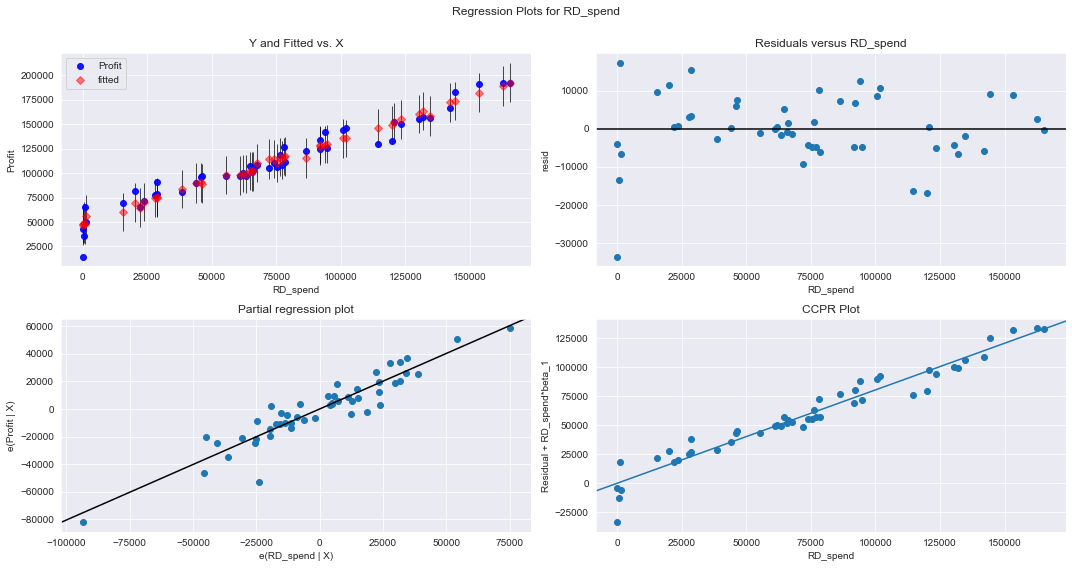

In [234]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model5, "RD_spend", fig=fig)
plt.show()

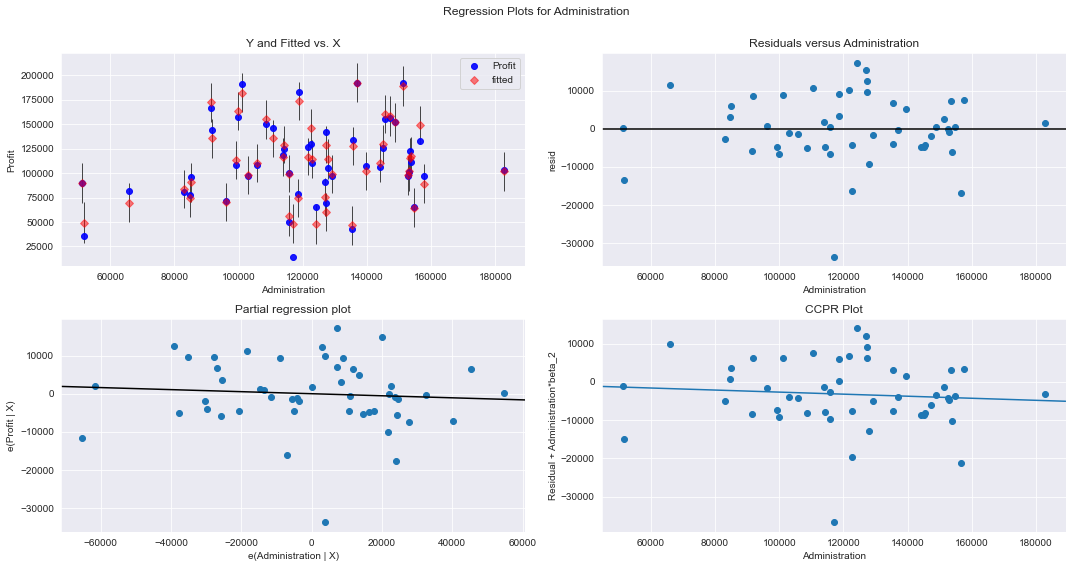

In [235]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model5, "Administration", fig=fig)
plt.show()

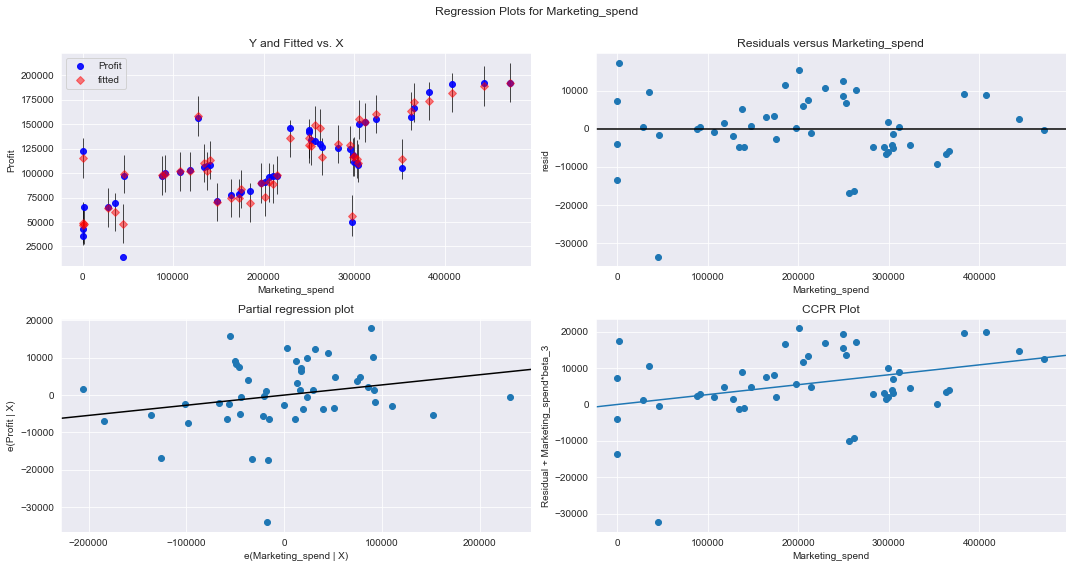

In [236]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model5, "Marketing_spend", fig=fig)
plt.show()

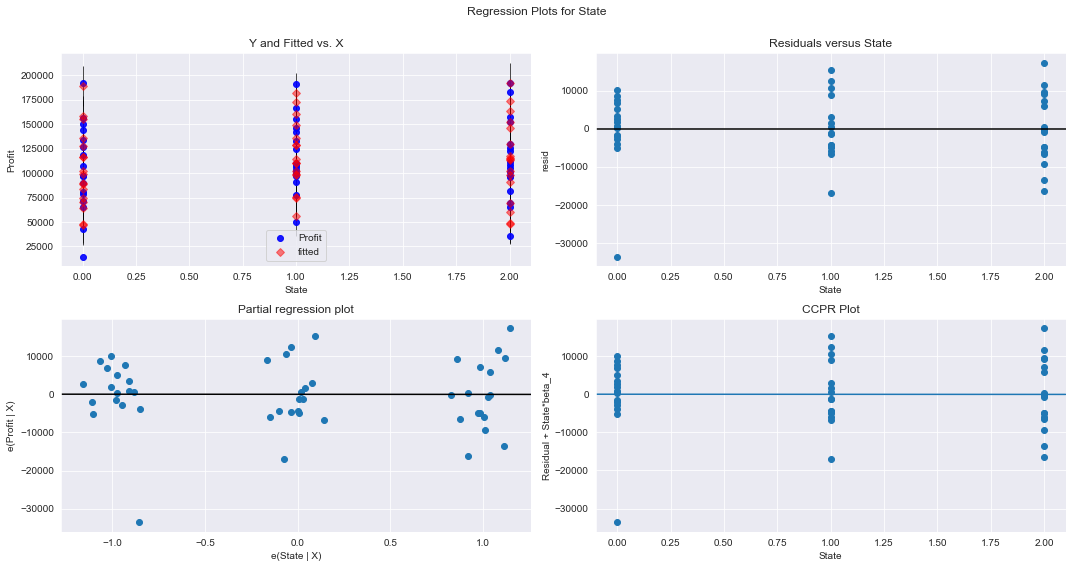

In [237]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model5, "State", fig=fig)
plt.show()

###  Observation from the above plot:

###  From partial regression  analysis 
####  1.we  drop marketing spend  for high correlation
####  2. we drop  state  

##  Conclusion :

###   With original data :
####     model3  has better performance

##   2. Boxcox Transform:

In [238]:
import  scipy.stats

In [239]:
startups_copy_1.head(2)

,RD_spend,Administration,Marketing_spend,Profit,State
0,165349.2,136897.80,471784.10,192261.83,2
1,162597.7,151377.59,443898.53,191792.06,0


In [240]:
startups_copy_3=startups_copy_1.copy()

In [241]:
startups_copy_3.head(2)

,RD_spend,Administration,Marketing_spend,Profit,State
0,165349.2,136897.80,471784.10,192261.83,2
1,162597.7,151377.59,443898.53,191792.06,0


In [242]:
boxAdm,lamda1=scipy.stats.boxcox(startups_copy_3.iloc[:,1])

In [243]:
lamda1

1.6196315568081547

In [244]:
boxRD,lamda2=scipy.stats.boxcox(max(startups_copy_3.iloc[:,0]+1)-startups_copy_3.iloc[:,0])

In [245]:
lamda2

0.7201765311773776

In [246]:
boxMar,lamda3=scipy.stats.boxcox(max(startups_copy_3.iloc[:,2]+1)-startups_copy_3.iloc[:,2])

In [247]:
boxstate,lamda4=scipy.stats.boxcox(max(startups_copy_3.iloc[:,4]+1)-startups_copy_3.iloc[:,4])

In [248]:
profit=startups_copy_3["Profit"]

In [249]:
boxAdm=pd.Series(boxAdm)

In [250]:
boxAdm=pd.DataFrame(boxAdm)

In [251]:
boxRD=pd.DataFrame(pd.Series(boxRD))

In [252]:
boxMar=pd.DataFrame(pd.Series(boxMar))

In [253]:
boxstate=pd.DataFrame(pd.Series(boxstate))

In [254]:
profit=pd.DataFrame(pd.Series(profit))

In [255]:
startups_copy_4=pd.DataFrame(columns={ "boxAdm":[boxAdm], "boxMar":[boxMar], "boxRD":[boxRD], "boxstate":[boxstate], "profit":[profit]})

In [256]:
startups_copy_4["boxRD"]=boxRD

In [257]:
startups_copy_4["boxAdm"]=boxAdm

In [258]:
startups_copy_4["boxMar"]=boxMar

In [259]:
startups_copy_4["boxstate"]=boxstate

In [260]:
startups_copy_4["profit"]=profit

In [261]:
startups_copy_4.head()

,boxAdm,boxMar,boxRD,boxstate,profit
0,1.287222e+08,0.000000,0.000000,0.000000,192261.83
1,1.514869e+08,1488.410490,415.261974,1.516385,191792.06
2,7.884125e+07,2605.698543,1195.083688,0.846367,191050.39
3,1.021310e+08,3251.057114,1797.444960,0.000000,182901.99
4,6.689990e+07,3661.280170,1935.302340,0.846367,166187.94


###  Linearity  check:

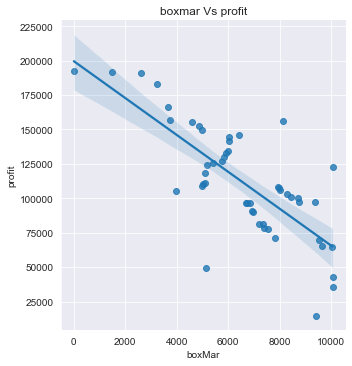

In [262]:
sns.lmplot(x='boxMar',y='profit',data=startups_copy_4)
plt.title('boxmar Vs profit')
plt.show()

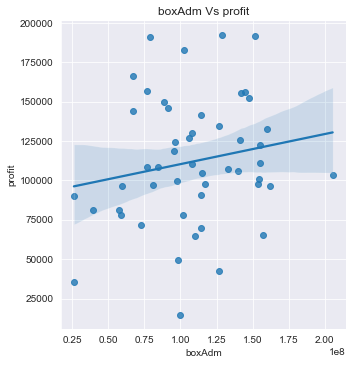

In [263]:
sns.lmplot(x='boxAdm',y='profit',data=startups_copy_4)
plt.title('boxAdm Vs profit')
plt.show()

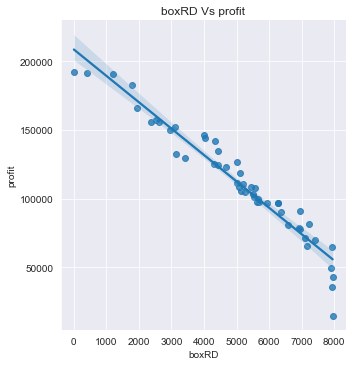

In [264]:
sns.lmplot(x='boxRD',y='profit',data=startups_copy_4)
plt.title('boxRD Vs profit')
plt.show()

In [265]:
startups_copy_4.head(2)

,boxAdm,boxMar,boxRD,boxstate,profit
0,1.287222e+08,0.00000,0.000000,0.000000,192261.83
1,1.514869e+08,1488.41049,415.261974,1.516385,191792.06


###  Correlation matrix and Heatmap:

In [266]:
startups_copy_4.corr()

,boxAdm,boxMar,boxRD,boxstate,profit
boxAdm,1.000000,0.036020,-0.211679,-0.019571,0.181227
boxMar,0.036020,1.000000,0.765337,0.088107,-0.760852
boxRD,-0.211679,0.765337,1.000000,0.098957,-0.966970
boxstate,-0.019571,0.088107,0.098957,1.000000,-0.093946
profit,0.181227,-0.760852,-0.966970,-0.093946,1.000000


<AxesSubplot:>

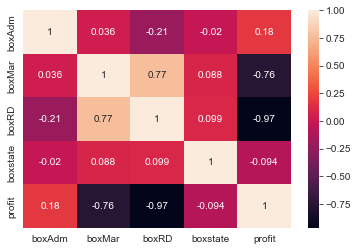

In [267]:
sns.heatmap(startups_copy_4.corr(),annot=True)

###  Scatter plot with Histograms:

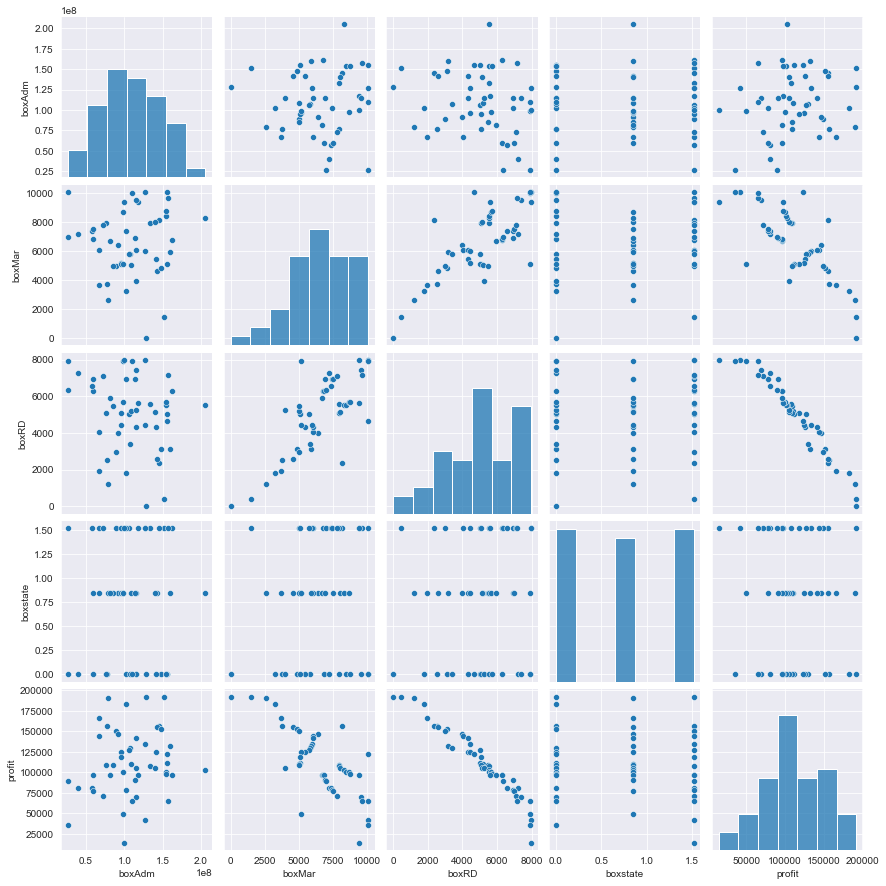

In [268]:
sns.set_style(style='darkgrid')
sns.pairplot(startups_copy_4)

##  Model Building || Model Training:

### Models:

In [269]:
model8=smf.ols(formula='profit~ boxRD+ boxAdm+  boxMar+ boxstate', data=startups_copy_4).fit()

In [270]:
model9=smf.ols(formula='profit~ boxRD+ boxAdm+  boxMar', data=startups_copy_4).fit()

In [271]:
model10=smf.ols(formula='profit~ boxRD+ boxAdm', data=startups_copy_4).fit()

In [272]:
model11=smf.ols(formula='profit~ boxRD+   boxMar', data=startups_copy_4).fit()

In [273]:
model12=smf.ols(formula='profit~ boxAdm+  boxMar', data=startups_copy_4).fit()

In [274]:
model13=smf.ols(formula='profit~ boxRD+ boxAdm+ boxstate', data=startups_copy_4).fit()

###  Model performance :

In [275]:
print('R2 Score    : ',round(model8.rsquared,4))
print('Adj.R2 Score: ',round(model8.rsquared_adj,4))
print('AIC Value   : ',round(model8.aic,4))
print('BIC Value   : ',round(model8.bic,4))

R2 Score    :  0.9363
Adj.R2 Score:  0.9306
AIC Value   :  1073.6368
BIC Value   :  1083.197


In [276]:
print('R2 Score    : ',round(model9.rsquared,4))
print('Adj.R2 Score: ',round(model9.rsquared_adj,4))
print('AIC Value   : ',round(model9.aic,4))
print('BIC Value   : ',round(model9.bic,4))

R2 Score    :  0.9363
Adj.R2 Score:  0.9321
AIC Value   :  1071.641
BIC Value   :  1079.2891


In [277]:
print('R2 Score    : ',round(model10.rsquared,4))
print('Adj.R2 Score: ',round(model10.rsquared_adj,4))
print('AIC Value   : ',round(model10.aic,4))
print('BIC Value   : ',round(model10.bic,4))

R2 Score    :  0.9356
Adj.R2 Score:  0.9329
AIC Value   :  1070.1718
BIC Value   :  1075.9079


In [278]:
print('R2 Score    : ',round(model11.rsquared,4))
print('Adj.R2 Score: ',round(model11.rsquared_adj,4))
print('AIC Value   : ',round(model11.aic,4))
print('BIC Value   : ',round(model11.bic,4))

R2 Score    :  0.9361
Adj.R2 Score:  0.9334
AIC Value   :  1069.8075
BIC Value   :  1075.5435


In [279]:
print('R2 Score    : ',round(model12.rsquared,4))
print('Adj.R2 Score: ',round(model12.rsquared_adj,4))
print('AIC Value   : ',round(model12.aic,4))
print('BIC Value   : ',round(model12.bic,4))

R2 Score    :  0.6225
Adj.R2 Score:  0.6064
AIC Value   :  1158.6032
BIC Value   :  1164.3393


In [280]:
print('R2 Score    : ',round(model13.rsquared,4))
print('Adj.R2 Score: ',round(model13.rsquared_adj,4))
print('AIC Value   : ',round(model13.aic,4))
print('BIC Value   : ',round(model13.bic,4))

R2 Score    :  0.9356
Adj.R2 Score:  0.9314
AIC Value   :  1072.1693
BIC Value   :  1079.8174


###    In this transformation :
####  we have to find  which model is best:
####   This can be done by using:
####   1. VIF Calculation
####   2. Residuals vs Regressor plot

###   Model Selection:

###  Calculating VIF:

In [281]:
startups_copy_4.head(2)

,boxAdm,boxMar,boxRD,boxstate,profit
0,1.287222e+08,0.00000,0.000000,0.000000,192261.83
1,1.514869e+08,1488.41049,415.261974,1.516385,191792.06


In [282]:
rsq_boxRD = smf.ols('boxRD~boxAdm+boxMar+boxstate',data=startups_copy_4).fit().rsquared  
vif_boxRD = 1/(1-rsq_boxRD) 

rsq_boxMar = smf.ols('boxMar~boxAdm+boxRD+boxstate',data=startups_copy_4).fit().rsquared  
vif_boxMar = 1/(1-rsq_boxMar) 

rsq_boxAdm = smf.ols('boxAdm~boxMar+boxRD+boxstate',data=startups_copy_4).fit().rsquared  
vif_boxAdm = 1/(1-rsq_boxAdm)

rsq_boxstate = smf.ols('boxstate~boxAdm+boxMar+boxRD',data=startups_copy_4).fit().rsquared  
vif_boxstate = 1/(1-rsq_boxstate) 

# Storing vif values in a data frame
#d1 = {'Variables':['boxRD','boxMar','boxAdm','boxstate'],'VIF':[vif_boxRD,vif_boxMar,vif_boxAdm,vif_boxstate]}
#Vif_frame = pd.DataFrame(d1)  
#Vif_frame

###  Dataframe of VIF Values:

In [283]:
# Storing vif values in a data frame
d1 = {'Variables':['boxRD','boxMar','boxAdm','boxstate'],'VIF':[vif_boxRD,vif_boxMar,vif_boxAdm,vif_boxstate]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,boxRD,2.806939
1,boxMar,2.680551
2,boxAdm,1.162102
3,boxstate,1.010291


###     Residual Vs Regressors:

In [284]:
import statsmodels.api as sm

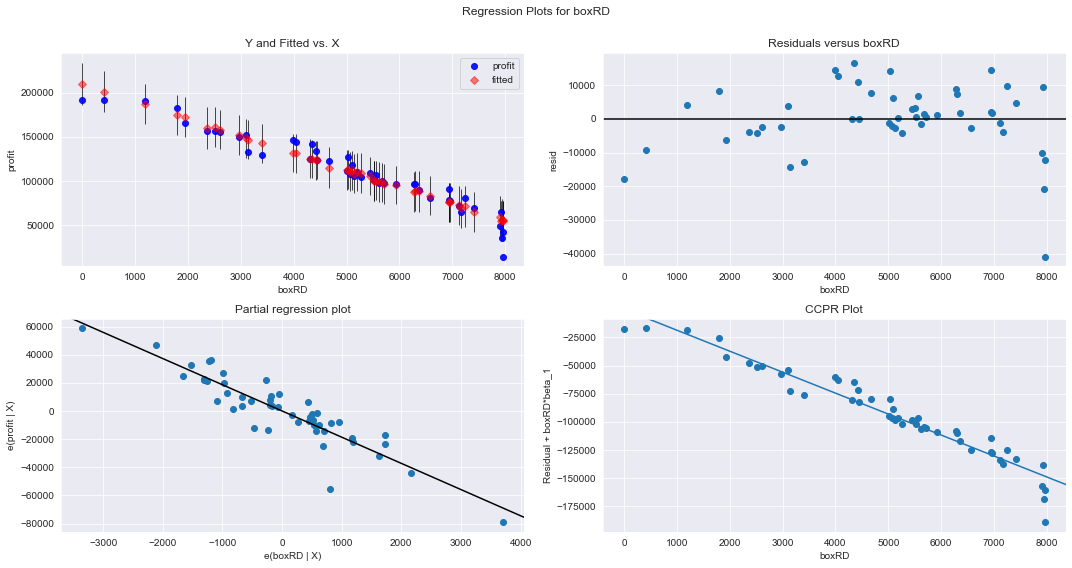

In [285]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model8, "boxRD", fig=fig)
plt.show()

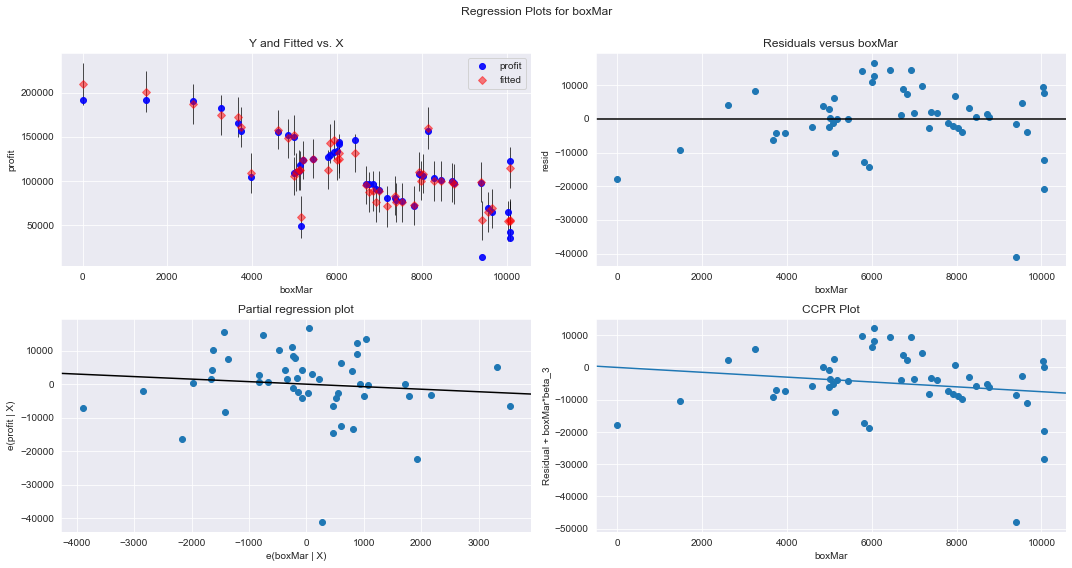

In [286]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model8, "boxMar", fig=fig)
plt.show()

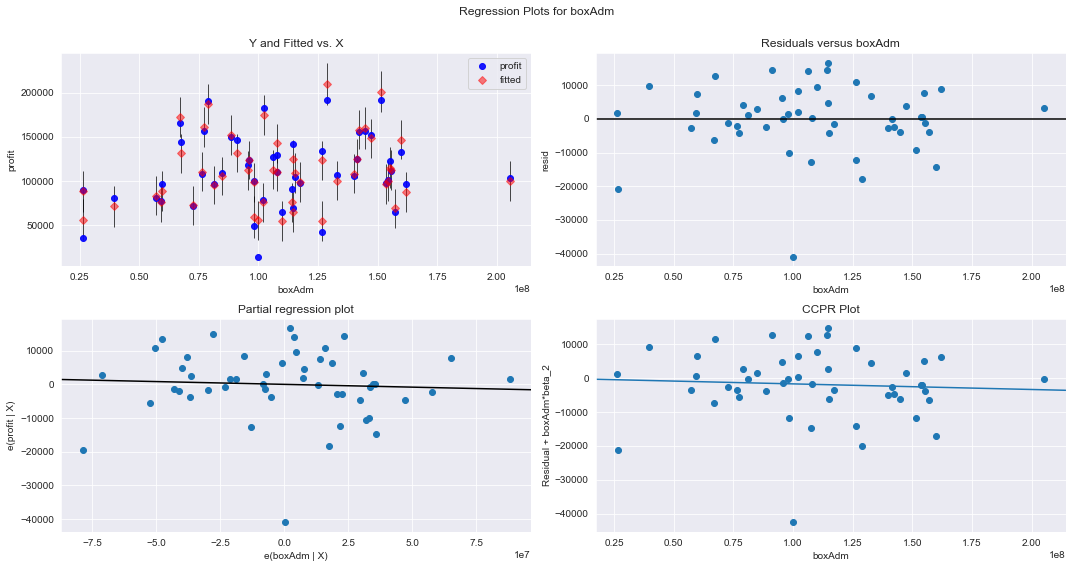

In [287]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model8, "boxAdm", fig=fig)
plt.show()

###  Observation :

###  From VIF and Regressor plot  :
####    we can drop  boxMar  variable for high correlation

##  Conclusion:

###  IN this transformation:



####   **model10  has better performance**

### ============================================================================

##  3. Square root Transformation:

In [288]:
startups_copy.head(1)

,R&D Spend,Administration,Marketing Spend,Profit,State
0,165349.2,136897.8,471784.1,192261.83,2


In [289]:
startups_copy_5=startups_copy.copy()

In [290]:
startups_copy_5["SqrtRD"]=np.sqrt(startups_copy_5["R&D Spend"])
startups_copy_5["Sqrtadm"]=np.sqrt(startups_copy_5["Administration"])
startups_copy_5["Sqrtmkt"]=np.sqrt(startups_copy_5["Marketing Spend"])
startups_copy_5["Sqrtstate"]=np.sqrt(startups_copy_5["State"])


In [291]:
startups_copy_6=startups_copy_5.iloc[:,5:]

In [292]:
startups_copy_6["Profit"]=startups_copy_5["Profit"]

In [293]:
startups_copy_6.head()

,SqrtRD,Sqrtadm,Sqrtmkt,Sqrtstate,Profit
0,406.631529,369.997027,686.865416,1.414214,192261.83
1,403.234051,389.072731,666.257105,0.000000,191792.06
2,391.716109,318.033882,638.697534,1.000000,191050.39
3,379.963696,344.487808,619.031195,1.414214,182901.99
4,376.971272,302.310718,605.118517,1.000000,166187.94


###  Scatter plot with histograms

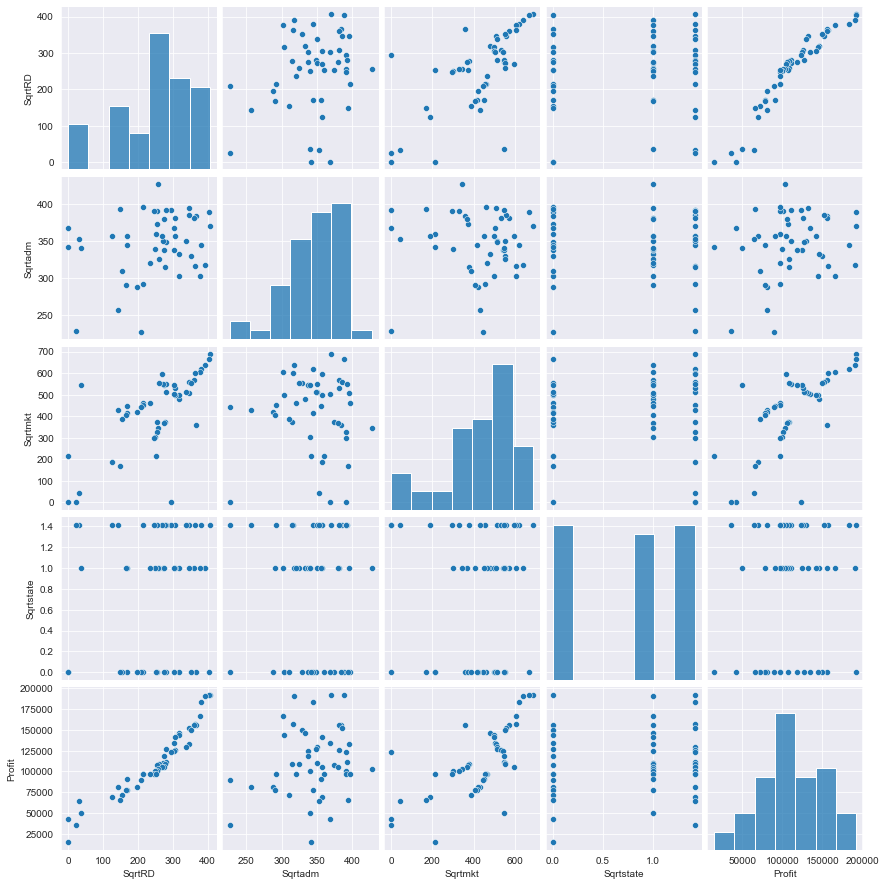

In [294]:
sns.set_style(style='darkgrid')
sns.pairplot(startups_copy_6)

###  Correlation Matrix and Heatmap

In [295]:
startups_copy_6.corr()

,SqrtRD,Sqrtadm,Sqrtmkt,Sqrtstate,Profit
SqrtRD,1.000000,0.263117,0.689709,0.120943,0.951352
Sqrtadm,0.263117,1.000000,-0.008601,0.010339,0.216830
Sqrtmkt,0.689709,-0.008601,1.000000,0.062369,0.691570
Sqrtstate,0.120943,0.010339,0.062369,1.000000,0.125631
Profit,0.951352,0.216830,0.691570,0.125631,1.000000


<AxesSubplot:>

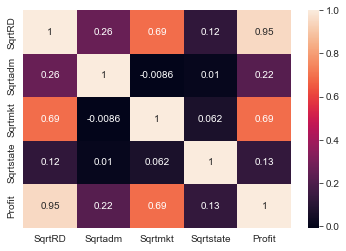

In [296]:
sns.heatmap(startups_copy_6.corr(),annot=True)

###  Model Building || Training

In [297]:
startups_copy_6.head(1)

,SqrtRD,Sqrtadm,Sqrtmkt,Sqrtstate,Profit
0,406.631529,369.997027,686.865416,1.414214,192261.83


###  Models:

In [298]:
model14=smf.ols(formula='Profit~ SqrtRD+Sqrtadm+Sqrtmkt+Sqrtstate', data=startups_copy_6).fit()

In [299]:
model15=smf.ols(formula='Profit~ SqrtRD+Sqrtadm+Sqrtstate', data=startups_copy_6).fit()

In [300]:
model16=smf.ols(formula='Profit~ SqrtRD', data=startups_copy_6).fit()

In [301]:
model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     111.1
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           1.02e-22
Time:                        12:50:09   Log-Likelihood:                -540.98
No. Observations:                  50   AIC:                             1092.
Df Residuals:                      45   BIC:                             1102.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.588e+04   1.63e+04      1.585      0.120   -7004.072    5.88e+04
SqrtRD       348.6319     25.773     13.527      0.000     296.723     400.541
Sqrtadm      -22.3190     46.121     -0.484      0.631    -115.212      70.574
Sqrtmkt       13.8514     15.120      0.916      0.364     -16.601      44.304
Sqrtstate    765.2057   3036.157      0.252      0.802   -5349.929    6880.340
==============================================================================
Omnibus:                        8.278   Durbin-Watson:                   0.816
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.919
Skew:                           0.965   Prob(JB):                       0.0191
Kurtosis:                       3.270   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [302]:
model15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     148.4
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           1.15e-23
Time:                        12:50:09   Log-Likelihood:                -541.44
No. Observations:                  50   AIC:                             1091.
Df Residuals:                      46   BIC:                             1099.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.162e+04   1.51e+04      2.100      0.041    1318.093    6.19e+04
SqrtRD       365.5470     17.950     20.365      0.000     329.416     401.678
Sqrtadm      -33.8511     44.292     -0.764      0.449    -123.007      55.305
Sqrtstate    662.8999   3028.798      0.219      0.828   -5433.755    6759.554
==============================================================================
Omnibus:                        7.554   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.310
Skew:                           0.935   Prob(JB):                       0.0259
Kurtosis:                       3.104   Cond. No.                     3.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [303]:
model16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     457.6
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           3.45e-26
Time:                        12:50:09   Log-Likelihood:                -541.79
No. Observations:                  50   AIC:                             1088.
Df Residuals:                      48   BIC:                             1091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.123e+04   4599.931      4.614      0.000     1.2e+04    3.05e+04
SqrtRD       362.4222     16.942     21.392      0.000     328.359     396.486
==============================================================================
Omnibus:                        6.642   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.434
Skew:                           0.879   Prob(JB):                       0.0401
Kurtosis:                       2.970   Cond. No.                         704.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
print('R2 Score    : ',round(model14.rsquared,4))
print('Adj.R2 Score: ',round(model14.rsquared_adj,4))
print('AIC Value   : ',round(model14.aic,4))
print('BIC Value   : ',round(model14.bic,4))

R2 Score    :  0.9081
Adj.R2 Score:  0.8999
AIC Value   :  1091.9641
BIC Value   :  1101.5242


In [305]:
print('R2 Score    : ',round(model15.rsquared,4))
print('Adj.R2 Score: ',round(model15.rsquared_adj,4))
print('AIC Value   : ',round(model15.aic,4))
print('BIC Value   : ',round(model15.bic,4))

R2 Score    :  0.9064
Adj.R2 Score:  0.9003
AIC Value   :  1090.8881
BIC Value   :  1098.5362


In [306]:
print('R2 Score    : ',round(model16.rsquared,4))
print('Adj.R2 Score: ',round(model16.rsquared_adj,4))
print('AIC Value   : ',round(model16.aic,4))
print('BIC Value   : ',round(model16.bic,4))

R2 Score    :  0.9051
Adj.R2 Score:  0.9031
AIC Value   :  1087.5788
BIC Value   :  1091.4028


###  Model Selection:

###  From different transformations ->



####  we  need to choose   best performing models:  

###  Among these 3 models  which we have choosen from different Transformation







####    The best model which can better perform:

#### 1st model performance:

In [307]:
model.coef_

array([[ 8.16892517e-01, -3.31413073e-02,  2.48480825e-02,
         4.46138234e+02]])

In [308]:
print("Rsquare value_train:",r2_score(y_train,y_train_pred))

Rsquare value_train: 0.946967630549264


In [309]:
print("Rsquare value_test:",r2_score(y_test,y_test_pred))

Rsquare value_test: 0.9815681366846222


#### model3 performance:

In [310]:
startups_copy_1.head(2)

,RD_spend,Administration,Marketing_spend,Profit,State
0,165349.2,136897.80,471784.10,192261.83,2
1,162597.7,151377.59,443898.53,191792.06,0


###  Prediction:

In [311]:
x_model3_test=startups_copy_1.drop(columns=["Marketing_spend","Profit","State"])

In [320]:
y_model3_pred=model3.predict(x_model3_test)
y_model3_pred.head(10)

0    190182.180514
1    187042.700174
2    181811.052822
3    173063.604832
4    172556.566886
5    163290.343299
6    163140.161084
7    159506.552582
8    150927.069214
9    155456.338405
dtype: float64

In [313]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           7.29e-31
Time:                        12:50:09   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
RD_spend           0.8621      0.030     28.589      0.000       0.801       0.923
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  model10 performance:

In [314]:
startups_copy_4.head(2)

,boxAdm,boxMar,boxRD,boxstate,profit
0,1.287222e+08,0.00000,0.000000,0.000000,192261.83
1,1.514869e+08,1488.41049,415.261974,1.516385,191792.06


In [315]:
#rd adm

In [316]:
x_model10_test=startups_copy_4.drop(columns=["profit","boxstate","boxMar"])

In [317]:
y_model10_pred=model10.predict(x_model10_test)

In [318]:
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     341.4
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           1.02e-28
Time:                        12:50:09   Log-Likelihood:                -532.09
No. Observations:                  50   AIC:                             1070.
Df Residuals:                      47   BIC:                             1076.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.119e+05   6506.265     32.571      0.000    1.99e+05    2.25e+05
boxRD        -19.3109      0.752    -25.670      0.000     -20.824     -17.798
boxAdm     -2.592e-05      4e-05     -0.649      0.520      -0.000    5.45e-05
==============================================================================
Omnibus:                       23.605   Durbin-Watson:                   0.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.561
Skew:                          -1.375   Prob(JB):                     1.28e-10
Kurtosis:                       6.783   Cond. No.                     5.07e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###   Model 3 is  the best performing model

### ============================================================